In [46]:
import gap_scorer 
import csv
from pprint import pprint

import nltk
from nltk.tag import pos_tag
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk import ne_chunk
from nltk import Tree
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

In [8]:
with open('gap-test.tsv', 'r') as f:
    reader = csv.DictReader(f, fieldnames=gap_scorer.GOLD_FIELDNAMES, delimiter='\t')
    rows = list(reader)[1:]

In [35]:
rows[0]

OrderedDict([('ID', 'test-1'),
             ('Text',
              "Upon their acceptance into the Kontinental Hockey League, Dehner left Finland to sign a contract in Germany with EHC M*nchen of the DEL on June 18, 2014. After capturing the German championship with the M*nchen team in 2016, he left the club and was picked up by fellow DEL side EHC Wolfsburg in July 2016. Former NHLer Gary Suter and Olympic-medalist Bob Suter are Dehner's uncles. His cousin is Minnesota Wild's alternate captain Ryan Suter."),
             ('Pronoun', 'His'),
             ('Pronoun-offset', '383'),
             ('A', 'Bob Suter'),
             ('A-offset', '352'),
             ('A-coref', 'FALSE'),
             ('B', 'Dehner'),
             ('B-offset', '366'),
             ('B-coref', 'TRUE'),
             ('URL', 'http://en.wikipedia.org/wiki/Jeremy_Dehner')])

In [56]:
list_answer = list()
for i, row in enumerate(rows):
    raw_text = row['Text']
    p_idx = int(row['Pronoun-offset'])
    b_idx = int(row['B-offset'])
    a_idx = int(row['A-offset'])

    a_label = row['A-coref']
    b_label = row['B-coref']

    # check whether the pronoun is placed before the A or B. 
    distance_a = p_idx - a_idx
    distance_b = p_idx - b_idx

    if a_label == 'TRUE':
        list_answer.append({'subject': 'true', 'p-e1': distance_a, 'p-e2': a_idx-b_idx})
    if b_label == 'TRUE':
        list_answer.append({'subject': 'true', 'p-e1': distance_b, 'p-e2': b_idx-a_idx})
    if a_label == 'FALSE':
        list_answer.append({'subject': 'false', 'p-e1': distance_a, 'p-e2': a_idx-b_idx})
    if b_label == 'FALSE':
        list_answer.append({'subject': 'false', 'p-e1': distance_a, 'p-e2': b_idx-a_idx})
    

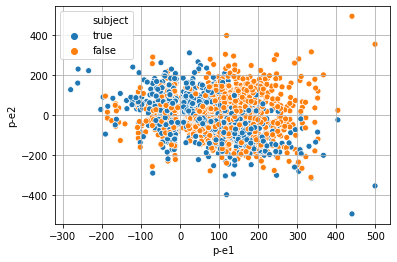

In [57]:
df = pd.DataFrame(list_answer)
sns.scatterplot(x='p-e1', y='p-e2', hue='subject', data=df)
plt.grid()

In [33]:
def write_prediction(list_answer):
    with open('snippet_output_20170634.tsv', 'w') as output:
        for idx, a, b in list_answer:
            # a = 'TRUE' if a else 'FALSE'
            # b = 'TRUE' if b else 'FALSE'
            row = f'test-{idx+1}\t{a}\t{b}\n'
            output.write(row)
    with open('page_output_20170634.tsv', 'w') as output:
        for idx, a, b in list_answer:
            # a = 'TRUE' if a else 'FALSE'
            # b = 'TRUE' if b else 'FALSE'
            row = f'test-{idx+1}\t{a}\t{b}\n'
            output.write(row)

write_prediction(list_answer)

In [34]:
scorecard_snippet = gap_scorer.run_scorer('gap-test.tsv','snippet_output_20170634.tsv')
print(scorecard_snippet)
print("===============================")

scorecard_snippet = gap_scorer.run_scorer('gap-test.tsv','page_output_20170634.tsv')
print(scorecard_snippet)

Overall recall: 54.7 precision: 48.5 f1: 51.4
		tp 970	fp 1030
		fn 803	tn 1197
Masculine recall: 54.3 precision: 48.3 f1: 51.1
		tp 483	fp 517
		fn 406	tn 594
Feminine recall: 55.1 precision: 48.7 f1: 51.7
		tp 487	fp 513
		fn 397	tn 603
Bias (F/M): 1.01

Overall recall: 54.7 precision: 48.5 f1: 51.4
		tp 970	fp 1030
		fn 803	tn 1197
Masculine recall: 54.3 precision: 48.3 f1: 51.1
		tp 483	fp 517
		fn 406	tn 594
Feminine recall: 55.1 precision: 48.7 f1: 51.7
		tp 487	fp 513
		fn 397	tn 603
Bias (F/M): 1.01

